### **California data house**

[Sumber data California house price]
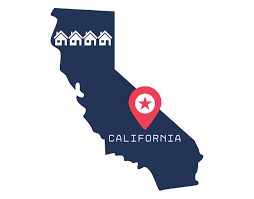
(https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

### **Contents**

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity
****

### **Pemahaman masalah Bisnis**

---



**Context**

Pasar harga perumahan sangat susah di prediksi saat ini. banyak hal yang mempengaruhi harga rumah saat ini, seperti  lokasi, tingkat ekonomi, tingkat penghasilan , luas tanah dan bangunan, seperti halnya untuk kasus dataset harga rumah di california sangat di pengaruhi beberapa hal diatas dan satu hal lagi di daerah tersebut juga rawan bencana. sehingga perubahan harga sangat fluktuatif

**Problem Statement**

Meskipun tersedia begitu banyak data, memprediksi harga rumah secara akurat masih menjadi tantangan besar. Akibatnya, banyak pembeli, penjual, dan investor yang masih mengandalkan intuisi daripada perkiraan berbasis data, yang sering kali berujung pada ketidakpastian finansial, peluang yang terlewatkan, atau bahkan investasi yang berisiko. Ketidaktersediaan prediksi yang dapat diandalkan juga menjadi hambatan bagi pembeli rumah pertama, sehingga memperburuk masalah keterjangkauan—terutama di pasar yang kompetitif seperti California. Secara lebih luas, fluktuasi harga rumah yang tidak stabil dapat memicu ketidakstabilan ekonomi, memengaruhi segalanya mulai dari pasar tenaga kerja lokal hingga sistem keuangan nasional.

**Tujuan**

Bagaimana cara kita untuk memahami fluktuasi harga dari dataset.
di harapkan dari cara pendekatan harga yang kita lakuakan yaitu Regresi linier, kita akan mudah dalam menentukan prediksi harga yang tepat yang bisa kita gunakan untuk market di wilayah California.

**Analisis Pendekatan**

yang akan kita lakukan adalah menganalisis data agar di dapat pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya.

pendekatan pertama adalah membangun suatu model regresi yang akan membantu kita untuk mendapatakan cara memprediksi harga rumah berdasarkan letak lokasi dan penghasilan

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Data comes from the 1990 U.S. Census for California districts.
- Each row represents a district/block group with aggregated housing and demographic information.

**Features (Columns)**
## 📊 Features (Columns) — California Housing Dataset

Each row in the dataset represents a California district/block group (from the 1990 U.S. Census).  
Below are the available features:

| Column               | Type     | Description |
|-----------------------|----------|-------------|
| `longitude`          | float    | Geographic coordinate (west = more negative). |
| `latitude`           | float    | Geographic coordinate (north = higher). |
| `housing_median_age` | float    | Median age of houses in the district. |
| `total_rooms`        | float    | Total number of rooms in all houses. |
| `total_bedrooms`     | float    | Total number of bedrooms in all houses (has missing values). |
| `population`         | float    | Total population in the district. |
| `households`         | float    | Number of households (groups of people living together). |
| `median_income`      | float    | Median income of households (in tens of thousands of dollars). |
| `ocean_proximity`    | object   | Categorical feature: distance to the ocean (`<1H OCEAN`, `INLAND`, `NEAR BAY`, `NEAR OCEAN`, `ISLAND`). |
| `median_house_value` | float    | Target variable: median house price (capped at $500,001). |





Tujuan kita adalah **Memprediksi harga rumah** di daerah California dengan pendekatan Regresi Linier.

In [38]:
# Import library yang dibutuhkan untuk eksplorasi dataset
from unittest import result
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing

**mounting data dari google drive**

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Replace with your own directory file

import os
os.chdir("/content/drive/MyDrive/PURWADHIKA/Capstone2/Capstone2/Capstone 2-20250902T134008Z-1-001/Capstone 2/Datasets for Students/Regression/California House")

In [41]:
# Load dataset dengan pandas
df = pd.read_csv("data_california_house.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


#### **Exploratory Data Analysis**

**Distribution california house prices**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


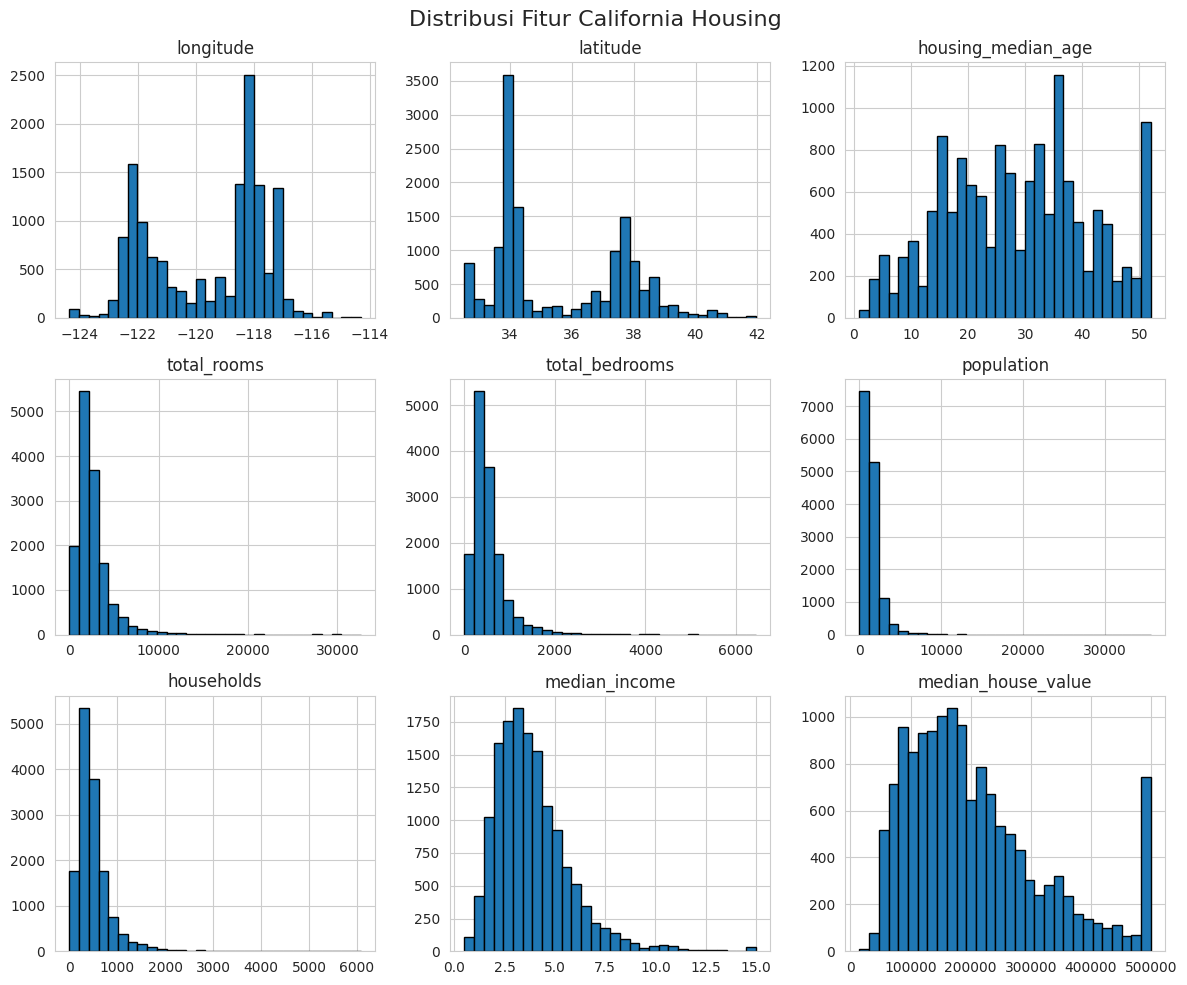

In [42]:
# Plot distribusi fitur
df.info()
df.describe()
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribusi Fitur California Housing", fontsize=16)
plt.tight_layout()
plt.show()


Berdasarkan plot distribusi median income dan median house value, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur harga rumah.

In [43]:
# Basic analysis of df

# Show summary statistics for numerical columns
print("Summary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Show unique values for categorical column
print("\nUnique values in 'ocean_proximity':")
print(df['ocean_proximity'].unique())

# Show correlation matrix (only for numeric columns)
print("\nCorrelation matrix:")
print(df.select_dtypes(include=[np.number]).corr())

Summary statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   


dari deskripsi matrix info data di atas sekilas kita mempunyai feature dengan korelasi terbesar yaitu Median House value dan median, selanjutnya akan kita coba meliahat apakah ada kaitan harga rumah dengan feature yang laen

**Types of property related to price**

In [44]:
# Load dataset
df.info()
# = pd.read_csv("C:\\Users\\user\\Documents\\Purwadhika\\Capstone2\\Capstone 2-20250902T134008Z-1-001\\Capstone 2\\Datasets for Students\\Regression\\California House\\data_california_house.csv")

# Cek jumlah properti berdasarkan ocean proximy group
print(f"Jumlah properti di tiap ocean proximity group:\n{df['ocean_proximity'].value_counts()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB
Jumlah properti di tiap ocean proximity group:
ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64


Kebanyakan properti berlokasi di OCEAN dan INLAND dan 2 buah bangunan ada di ISLAND.

In [45]:
# Cek median house value untuk tiap ocean proximity
df_median_price = df.groupby(by=['ocean_proximity']).agg({'median_house_value':'median'}).reset_index()
df_median_price = df_median_price.set_index('ocean_proximity')
df_median_price = df_median_price.sort_values('median_house_value', ascending=False)
df_median_price.head()

,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0
<1H OCEAN,214800.0
INLAND,108800.0


,median_house_value
ocean_proximity,
<1H OCEAN,214800.0
INLAND,108800.0
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0


Text(0.5, 1.0, 'Median House Value by Ocean Proximity')

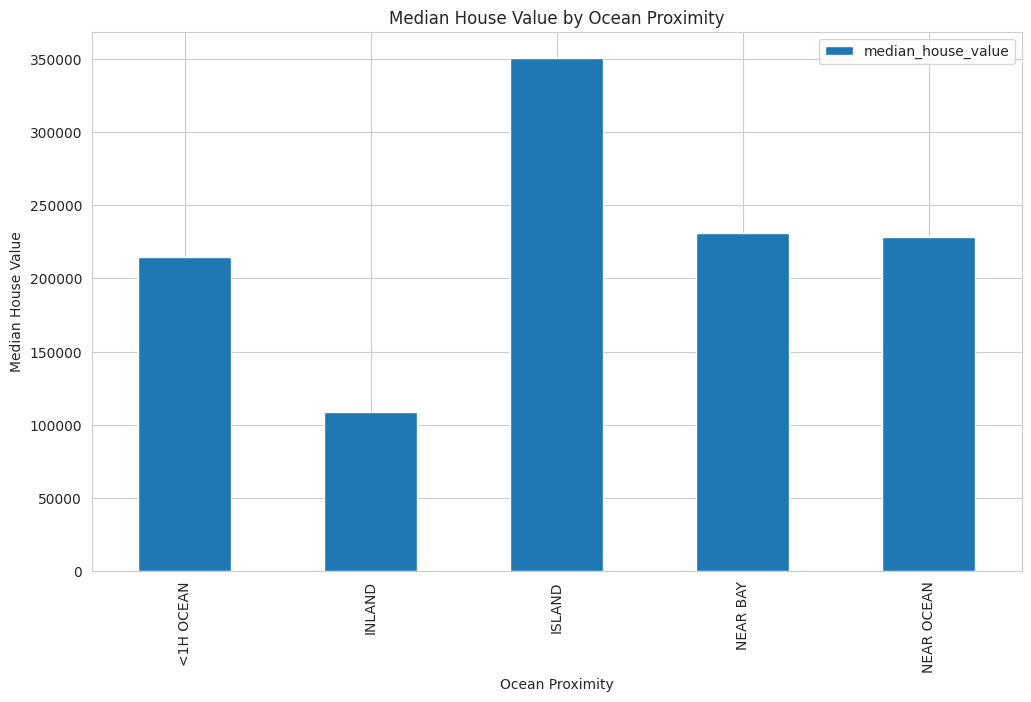

In [46]:
# Plot median house value for each ocean proximity
from IPython.display import display

ocean_pivot = df.pivot_table(index='ocean_proximity', values='median_house_value', aggfunc='median')
display(ocean_pivot)

pivot_plot = ocean_pivot.plot.bar(stacked=False, figsize=(12, 7))
pivot_plot.set_xlabel('Ocean Proximity')
pivot_plot.set_ylabel('Median House Value')
pivot_plot.set_title('Median House Value by Ocean Proximity')

  Area populasi di Island memiliki harga median tertinggi di kisaran harga $351100 pada hal jumalh porperty di area tersebut hanya 2

  sedangkan untuk nilai median value terendah berada di Inland, di mana nilainya adalah $108800

**Location**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  int8   
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), int8(1)
memory usage: 1.0 MB


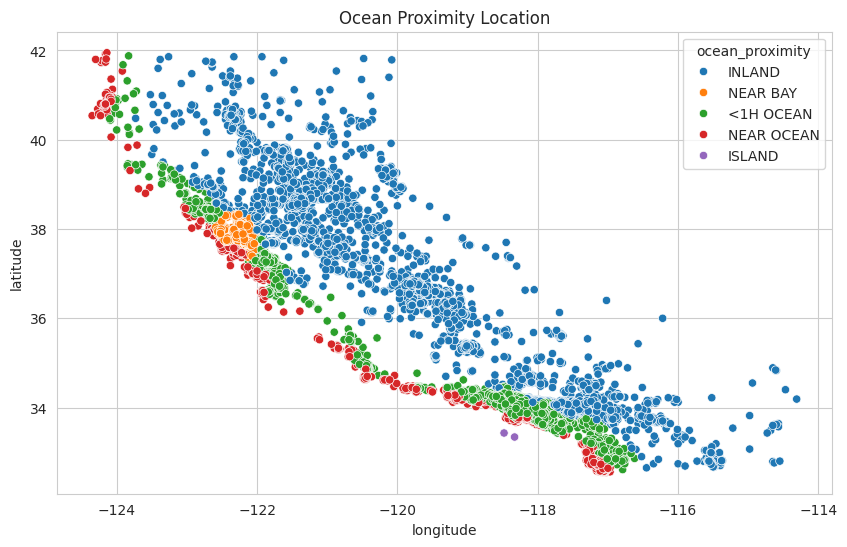

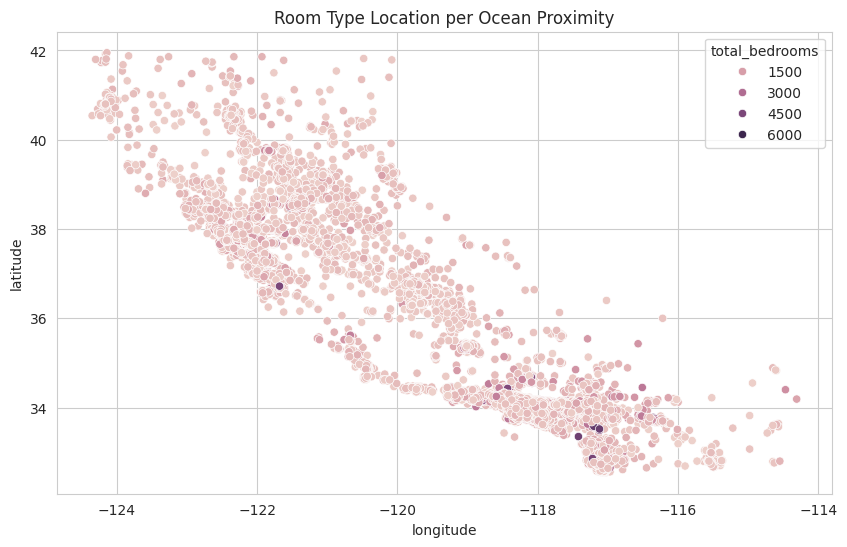

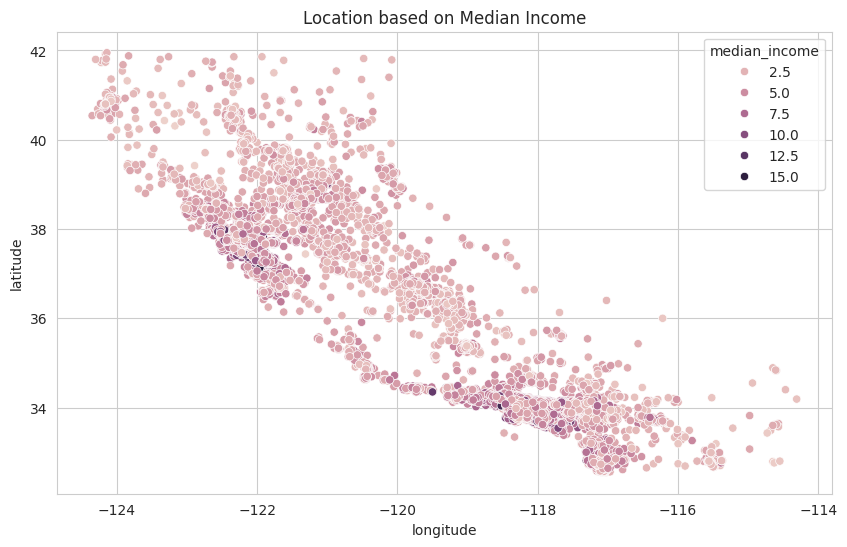

<Figure size 1000x600 with 0 Axes>

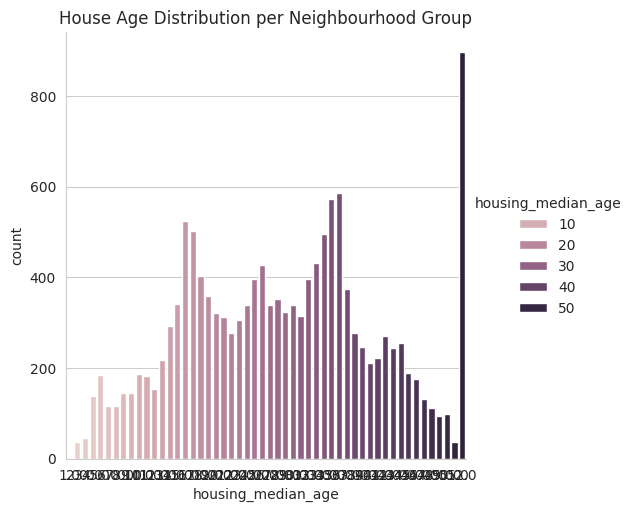

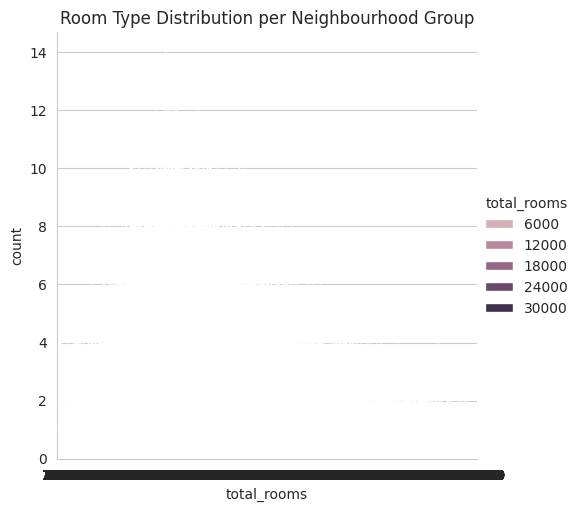

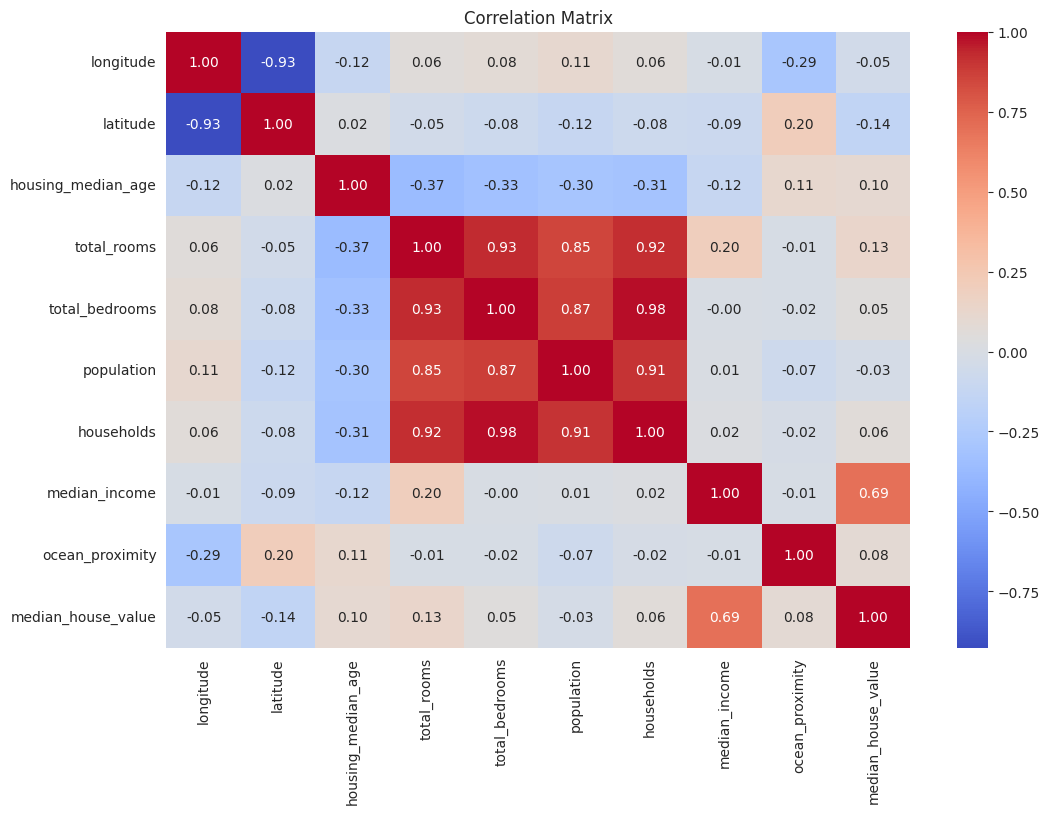

Mean Absolute Error (MAE): 50874.50032232115
Root Mean Squared Error (RMSE): 70467.42459829939


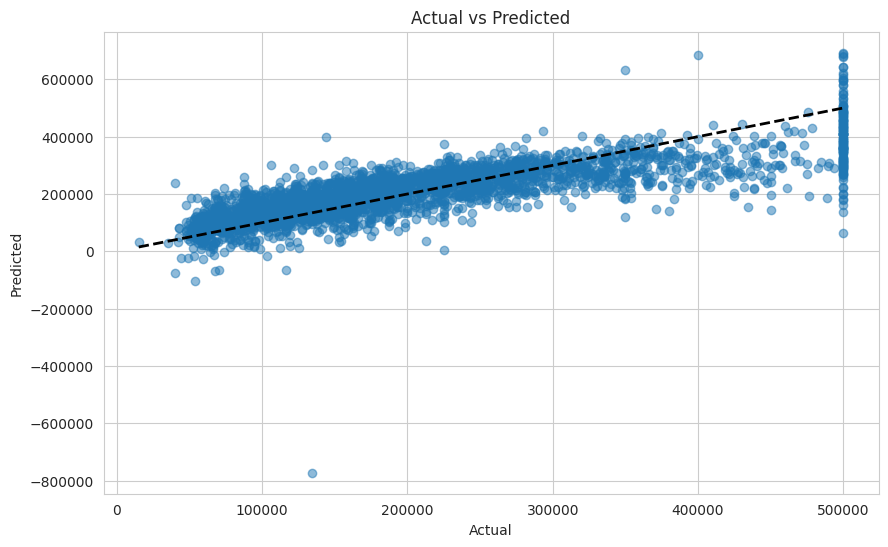

In [47]:
# Plot lokasi 'ocean_proximity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity']).set_title('Ocean Proximity Location')

# Plot persebaran 'room_type'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['total_bedrooms']).set_title('Room Type Location per Ocean Proximity');

# plot persebaran 'location' berdasarkan 'median_income'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['median_income']).set_title('Location based on Median Income');

# persebaran umur rumah berdasarkan neighbourhood group
plt.figure(figsize=(10,6))
# persebaran umur rumah berdasarkan neighbourhood group
sns.set_style("whitegrid")
sns.catplot(x='housing_median_age', kind='count', hue='housing_median_age', data=df);
plt.title('House Age Distribution per Neighbourhood Group');
# Persebaran tipe kamar berdasarkan neighbourhood group
sns.catplot(x='total_rooms', kind='count', hue='total_rooms', data=df);
plt.title('Room Type Distribution per Neighbourhood Group');
# Plot actual vs predicted values with better visualization
# Mengubah tipe data 'last_review' menjadi datetime
# df['last_review'] = pd.to_datetime(df['last_review'])
df_model = df.copy()
df_model['ocean_proximity'] = df_model['ocean_proximity'].astype('category').cat.codes
df_model.info()
df_model.head()




# Cek korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df_model.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Memisahkan fitur dan target variabel
X = df_model.drop('median_house_value', axis=1)
y = df_model['median_house_value']
# X = df_model.drop('price', axis=1) --- IGNORE ---


# Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in features
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standarisasi fitur numerik
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Melatih model regresi linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Memprediksi nilai pada data uji
y_pred = model.predict(X_test_scaled)

# Evaluasi model menggunakan Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#plot pesebaran population dan median_hosue_value

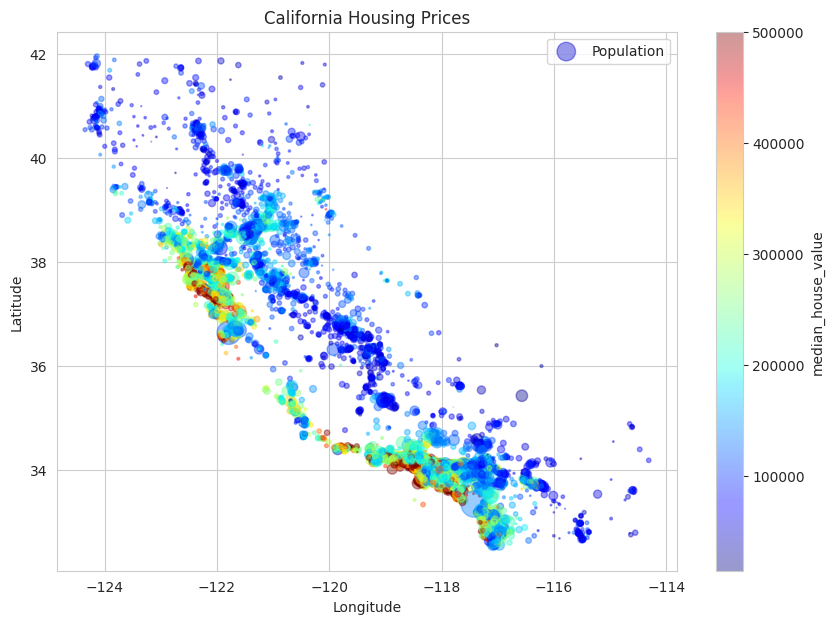

In [48]:
# # plot persebaran median_income berdasarkan location
# plt.figure(figsize=(10,6))
# sns.set_style("whitegrid")
# sns.catplot(x='median_income', kind='count', , data=df, height=7, aspect=1.5);
# plt.title('Median Income Distribution per Location');
# #plot pesebaran median_income berdasarkan location
# plt.figure(figsize=(10,6))
# sns.set_style("whitegrid")
# sns.catplot(x='longitude', y='latitude', alpha=0.5,cmap='Blues', kind='count', hue='location', data=df, height=7, aspect=1.5);
# plt.title('Longitude Distribution per Location');

# # sns.scatterplot(df['longitude'], df['latitude'], hue=df['median_income']).set_title('Median Income Distribution per Location');
# #plot pesebaran population dan median_house_value
# plt.figure(figsize=(10,6))
# sns.scatterplot(df['longitude'], df['latitude'], hue=df['population']).set_title('Population Distribution per Location');
# # --- IGNORE ---
# # --- IGNORE ---
# # --- IGNORE ---

import matplotlib.pyplot as plt

# Create the scatter plot using df
df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,                                # transparency for overlapping points
    s=df["population"] / 100,                 # circle size scaled by population
    label="Population",
    figsize=(10, 7),
    c="median_house_value",                   # color by median house value
    cmap=plt.get_cmap("jet"),                 # color map (blue → red)
    colorbar=True,
    sharex=False
)
# Grouping tipe properti berdasarkan letak Bangunan RUmah
df.groupby(['ocean_proximity', 'population']).size().unstack(fill_value=0)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices")
plt.show()


Dapat terlihat bahwa di wilayah California, Populasi tertinggi harga rumah yang cukup tinggi berada di daerah Near ocean, near Bay dan <1H Ocean, sehinnga ada kemungkinan besar akan ada harga rumah yang cukup kompetitiv di daerah tersebut

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [49]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [50]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-119.42, -121.01]"
1,latitude,float64,0,0.00,836,"[39.54, 33.45]"
2,housing_median_age,float64,0,0.00,52,"[37.0, 43.0]"
3,total_rooms,float64,0,0.00,5227,"[3980.0, 5087.0]"
4,total_bedrooms,float64,137,0.95,1748,"[986.0, 1739.0]"
5,population,float64,0,0.00,3498,"[54.0, 2153.0]"
6,households,float64,0,0.00,1649,"[93.0, 348.0]"
7,median_income,float64,0,0.00,9797,"[0.8691, 10.0346]"
8,ocean_proximity,object,0,0.00,5,"[NEAR BAY, <1H OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[371700.0, 132400.0]"


Dari info dataset di atas, terdapat data yang kosong pada fitur total_bedrooms. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data-data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

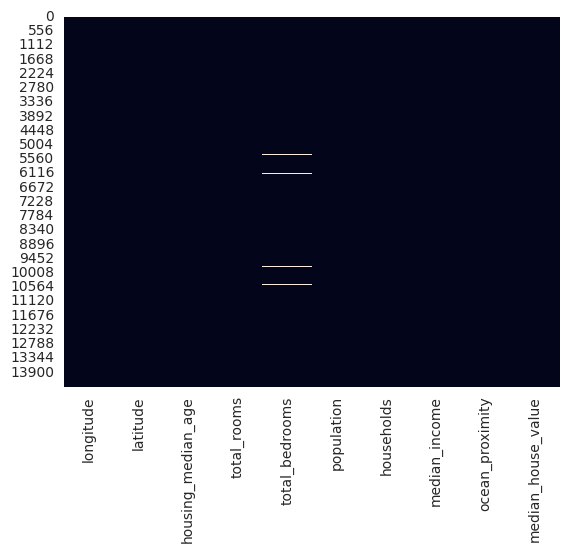

In [51]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Terdapat 1 fitur yang memiliki missing value. yaitu fiture Total_Bedrooms

Kita juga dapat mengetahui bahwa tidak ada data yang duplikat pada dataset dengan melihat jumlah data unik dari fitur id, di mana jumlah data uniknya sama dengan jumlah keseluruhan data. Oleh karena itu, dataset ini tidak memiliki data yang duplikat. Untuk memastikannya, kita bisa cek dengan menggunakan function duplicated().

In [52]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(0)

**Drop Columns**

di perlukan pertimbangan sebelum melakukan drop pada kolom atau fitur.
karena kita akan menganalisis harga degan fiture lokasi dan median income, maka beberapa fiture bisa kita drop sperti total_rooms ataupun total_bedroom, karena dari analisis kita fiture tersebut tidak serta merta mempengaruhi harga rumah di wilayah California.

pada dasranya kita bisa menggunakan semua fitur yang ada setelah kita preprocessing. namun ada satu object Ocean_proximity yang merupakan object non numeric sehingga kita perlu melakukan encoding.

In [53]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Missing Value**

In [54]:
# Cek nilai missing value
df_model.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,137
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [55]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


dari tabel terlihat dari fiture total_bedrooms memilki jumlah yang berbeda dengan data lainya, di karenakan tidak ada datanya alias null, sehingga kita haru drop total_bedroom. kemudian ada nilai yang cukuk tinggi pada median_income dan median_house_value. di mana nilainya sangat tinggi jika di bandingkan dengan median valuenya. sehingga kita perlu melakukan filtering data atau capping data. karena akan mempengaruhi nilai prediksi kita jika di lakukan pemodelan.

In [56]:
# Cek kembali dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Data Correlation**

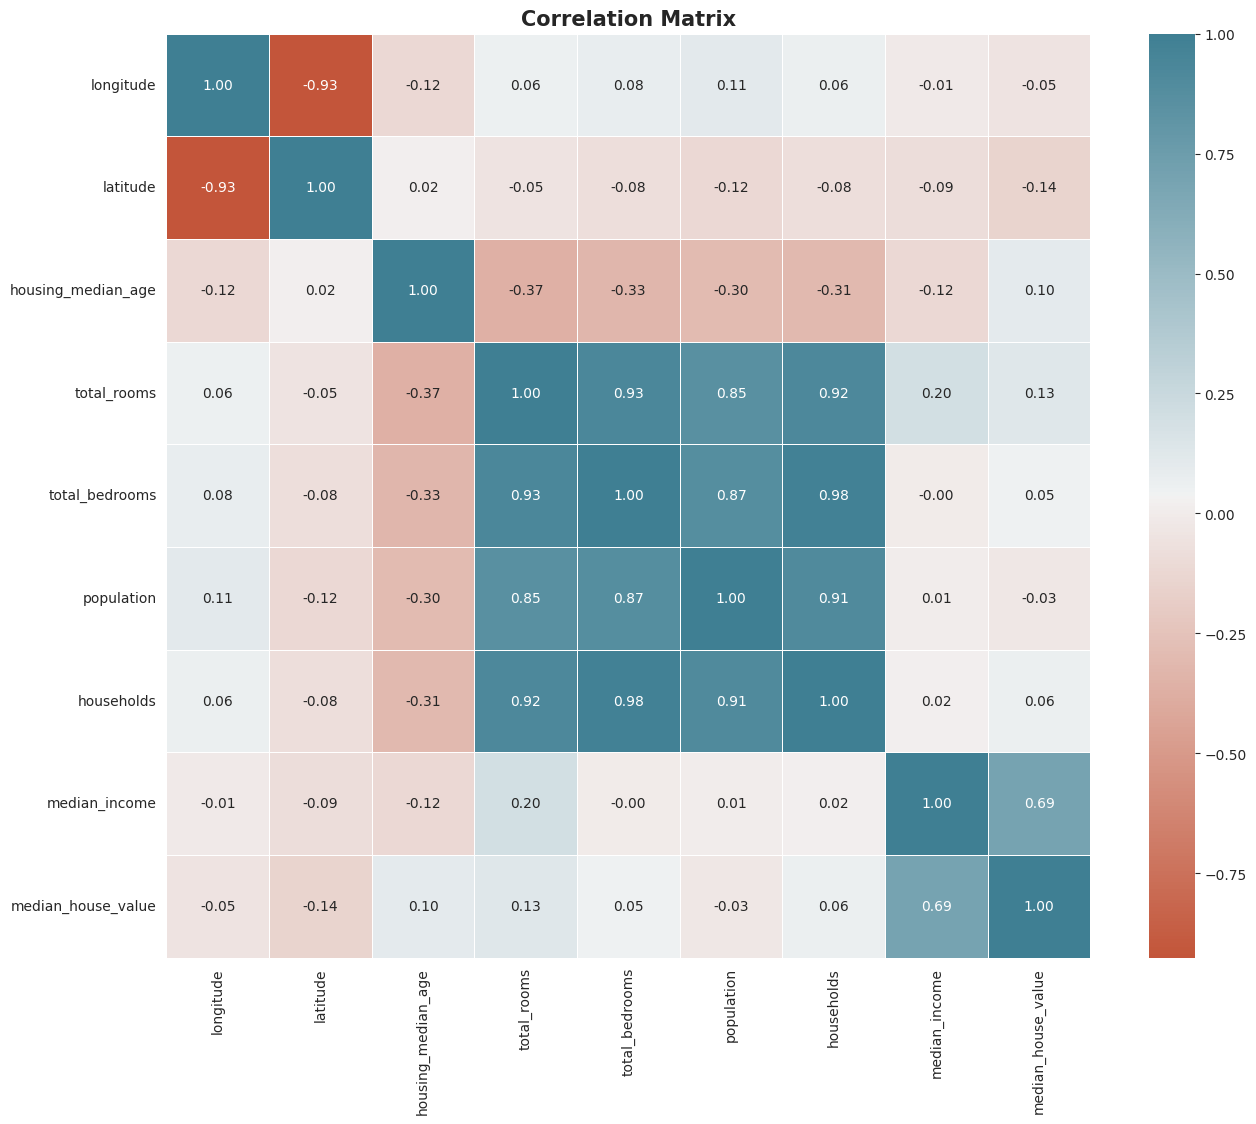

In [57]:
# karena ocean_proximity adalah categorical, maka kita drop fitur ocean_proximity
df_model = df_model.drop(columns=['ocean_proximity'], axis=1)

# Correlation matrix

# Cek korelasi antar fitur numerik
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_model.corr(), annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()
# Cek korelasi antar fitur numerik

plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa ada fitur yang memiliki korelasi yang kuat terhadap fitur median_house_value dan median_income. selain itu ada beberapa fitur yang mempunyai nilai Korelasi tinggi dimiliki oleh fitur 'latitude', di mana korelasinya adalah korelasi negatif. Ini berarti semakin ke barat/mendekati garis pantai lokasi perumahan, maka harganya pun semakin tinggi. untuk fiture laen seperti household, total_bedrooms,population dan total room juga mempunyai korelasi yang tinggi terhadap mereka sendiri, tidak langsung mempunyai korelasi dengan media_house_value

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

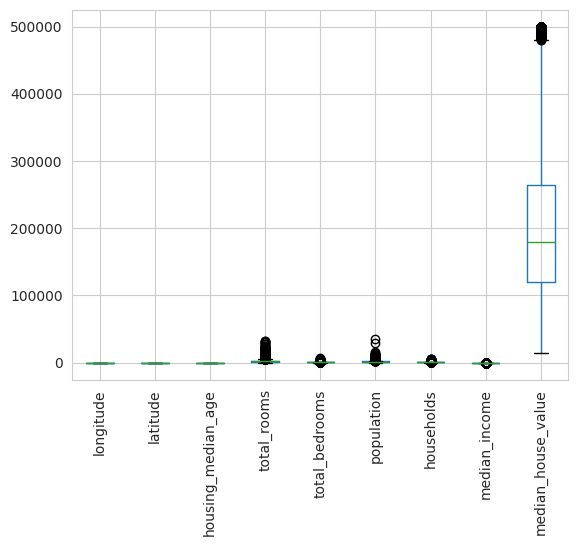

In [58]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, berikutnya akan dilakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [59]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [60]:
# Outliers pada fitur harga rumah
find_anomalies(df_model['median_house_value'])

IQR: 144300.0
limit_bawah: -96850.0
limit_atas: 480350.0


In [61]:
# Outliers pada fitur median_income
find_anomalies(df_model['median_income'])

IQR: 2.1655000000000006
limit_bawah: -0.6776500000000012
limit_atas: 7.984350000000001


In [62]:
# Outliers pada fitur polpulation
find_anomalies(df_model['population'])

IQR: 940.0
limit_bawah: -626.0
limit_atas: 3134.0


In [63]:
# Outliers pada fitur total_rooms
find_anomalies(df_model['total_rooms'])

IQR: 1697.0
limit_bawah: -1094.5
limit_atas: 5693.5


In [64]:
# Outliers pada fitur housing_median_age
find_anomalies(df_model['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Price**

In [65]:
# Cek deskriptif statistik kolom harga rumah
df_model['median_house_value'].describe()

,median_house_value
count,14448.000000
mean,206824.624516
std,115365.476182
min,14999.000000
25%,119600.000000
50%,180000.000000
75%,263900.000000
max,500001.000000


In [66]:
# Cek harga rumah > $500000
df_model[df_model['median_house_value'] > 500000].count()['median_house_value']

np.int64(678)

Terlihat bahwa 75% data pada kolom price bernilai kurang dari USD 270000, sedangkan nilai maksimalnya adalah USD 500000. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 678 data yang nilai price-nya lebih besar dari USD 500000 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki price lebih besar dari  USD 500000 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

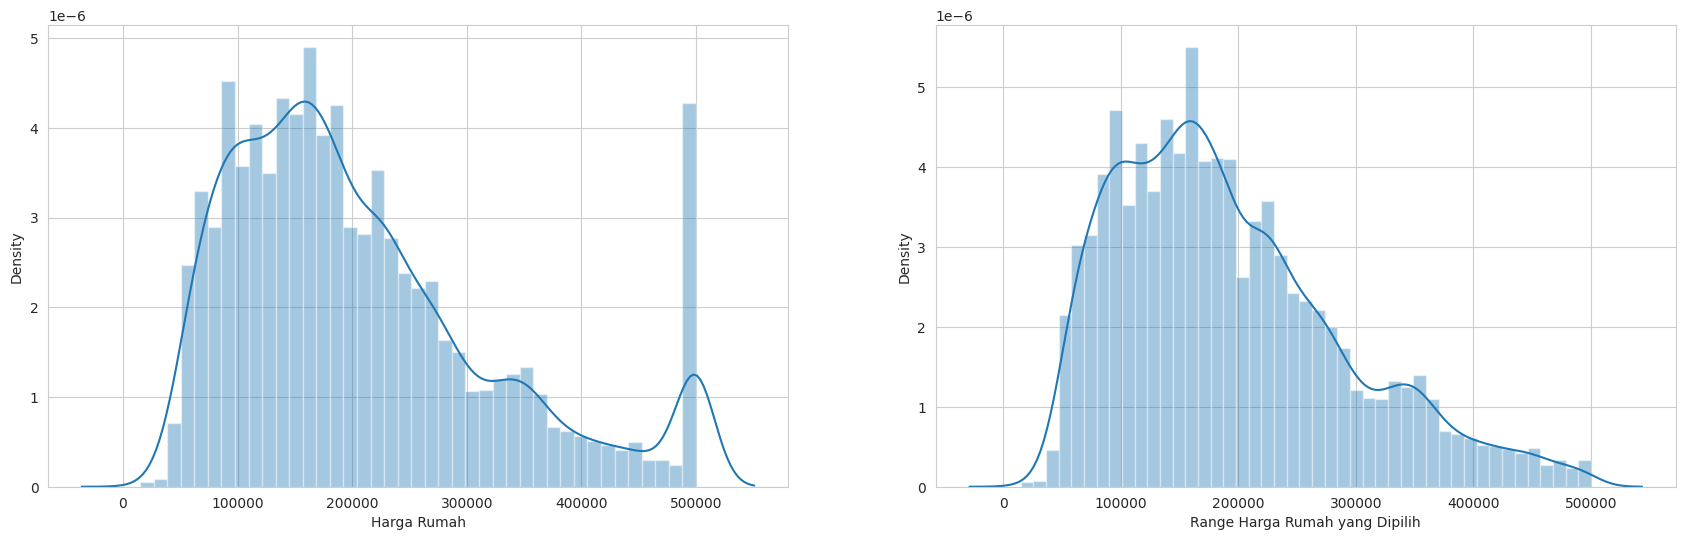

In [67]:
# Melakukan filtering pada data
df_model = df_model[(df_model['median_house_value'] <= 500000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])

axes[0].set_xlabel('Harga Rumah')
axes[1].set_xlabel('Range Harga Rumah yang Dipilih');

In [68]:
# Cek deskriptif statistik kolom 'median_house_value' setelah filtering
df_model['median_house_value'].describe()

,median_house_value
count,13770.000000
mean,192389.360712
std,97589.825606
min,14999.000000
25%,116700.000000
50%,174000.000000
75%,248000.000000
max,500000.000000


**Minimum Nights**

setelah melakukan pemfilteran data kita bisa meliminasi data oultline dia tas 500000 sehingga hanya data di bawahnya yang akan kita masukan dalam pemodelan.

**Clean Dataset**

In [69]:
# Cek dataset yang sudah bersih
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0


In [70]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13770 entries, 0 to 14447
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13770 non-null  float64
 1   latitude            13770 non-null  float64
 2   housing_median_age  13770 non-null  float64
 3   total_rooms         13770 non-null  float64
 4   total_bedrooms      13639 non-null  float64
 5   population          13770 non-null  float64
 6   households          13770 non-null  float64
 7   median_income       13770 non-null  float64
 8   median_house_value  13770 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


Pada akhirnya, tersisa 12100 data yang akan digunakan untuk pemodelan. Ini berarti lebih dari 50% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **Modeling**

In [71]:
# Install missing package
%pip install category_encoders
# %pip install xgboost

# Import library untuk modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [72]:
# Mengubah fitur kategorikal menjadi numerikal

housing_cat = df[['ocean_proximity']]
housing_cat.head(10)
ordinal_encoder = ce.OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded.head(10)
housing_cat_encoded.info()
housing_cat_encoded
housing_cat_encoded
housing_cat




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ocean_proximity  14448 non-null  int64
dtypes: int64(1)
memory usage: 113.0 KB


,ocean_proximity
0,INLAND
1,NEAR BAY
2,<1H OCEAN
3,<1H OCEAN
4,INLAND
...,...
14443,INLAND
14444,INLAND
14445,NEAR OCEAN
14446,<1H OCEAN


**Transfomer**

In [73]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14448 stored elements and shape (14448, 5)>

In [74]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [75]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14448 stored elements and shape (14448, 5)>

In [76]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [77]:
df_model.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(df.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df.values)

In [79]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(df.columns)+["rooms_per_household", "population_per_household"],
    index=df.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,population_per_household
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.975,INLAND,47500.0,2.8,4.825
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.67148,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.299,<1H OCEAN,285800.0,6.478022,3.81044
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518,3.051
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,3.628743


In [80]:
# df.info
# df.dropna(inplace=True) # Drop missing values for simplicity

# Memisahkan data independen variabel dengan target
X = housing_extra_attribs.drop(['ocean_proximity'], axis=1)
y = housing_extra_attribs['ocean_proximity']
y.info()
X.info()
# Pastikan 'ocean_proximity' ada di X
# if 'ocean_proximity' not in df_model.columns:
#     raise ValueError("'ocean_proximity' column is missing from df_model!")

# X = df_model.drop(['median_house_value'], axis=1)
# y = df_model['median_house_value']
y.info()
X.info()

# X = df_model.drop(['price'], axis=1) --- IGNORE ---
# y = df_model['price'] --- IGNORE ---
# X = df_model.drop(['price'], axis=1) --- IGNORE ---
# y = df_model['price'] --- IGNORE ---

<class 'pandas.core.series.Series'>
RangeIndex: 14448 entries, 0 to 14447
Series name: ocean_proximity
Non-Null Count  Dtype 
--------------  ----- 
14448 non-null  object
dtypes: object(1)
memory usage: 113.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   longitude                 14448 non-null  object
 1   latitude                  14448 non-null  object
 2   housing_median_age        14448 non-null  object
 3   total_rooms               14448 non-null  object
 4   total_bedrooms            14311 non-null  object
 5   population                14448 non-null  object
 6   households                14448 non-null  object
 7   median_income             14448 non-null  object
 8   median_house_value        14448 non-null  object
 9   rooms_per_household       14448 non-null  object
 10  population_per_household

**Train and Test Splitting**

In [81]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)
X_train.info()
X_test.info()
y_train.info()
y_test.info()
# model.fit(X_train, y_train)


<class 'pandas.core.frame.DataFrame'>
Index: 10113 entries, 3160 to 7270
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   longitude                 10113 non-null  object
 1   latitude                  10113 non-null  object
 2   housing_median_age        10113 non-null  object
 3   total_rooms               10113 non-null  object
 4   total_bedrooms            10013 non-null  object
 5   population                10113 non-null  object
 6   households                10113 non-null  object
 7   median_income             10113 non-null  object
 8   median_house_value        10113 non-null  object
 9   rooms_per_household       10113 non-null  object
 10  population_per_household  10113 non-null  object
dtypes: object(11)
memory usage: 948.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 7834 to 13427
Data columns (total 11 columns):
 #   Column                    Non-Null Cou

***Data Splitting***

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# housing = df_model.copy()
# Load dataset
housing = pd.read_csv("data_california_house.csv")
# drop rows with missing target values
housing = housing.dropna(subset=["total_bedrooms"])

# Separate features and target
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

# Identify numeric and categorical columns
num_attribs = list(X.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

# Numeric pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline with safe handling of rare/unseen categories
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Full preprocessing pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform data
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

print("Shape after preprocessing:", X_train_prepared.shape)


Shape after preprocessing: (11448, 13)


**Choose a Benchmark Model**

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Define algorithms
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Wrap with log-transform target
log_lr = TransformedTargetRegressor(regressor=lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(regressor=knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(regressor=dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(regressor=xgb, func=np.log, inverse_func=np.exp)

# Scaling
scaler = StandardScaler(with_mean=False)

# Candidate models
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

# Preprocessing: OneHot for categorical, passthrough for numeric
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity'])
], remainder='passthrough')

# Cross-validation
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

for model in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    # RMSE
    scores = cross_val_score(estimator, X_train, y_train,
                             cv=crossval,
                             scoring='neg_root_mean_squared_error')
    rmse_scores = -scores
    print(f"{model}: RMSE mean={rmse_scores.mean():.2f}, std={rmse_scores.std():.2f}")


TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression()): RMSE mean=86066.13, std=4950.42
TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor()): RMSE mean=62466.63, std=1052.53
TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1)): RMSE mean=69296.40, std=1103.91
TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1)): RMSE mean=51777.18, std=1513.43
TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
   

In [84]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Define cross-validation
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Dictionary to store results
results = []

for model in models:   # models = [log_lr, log_knn, log_dt, log_rf, log_xgb]
    estimator = Pipeline([
        ("preprocessing", transformer),   # your ColumnTransformer with imputer + OneHot
        ("scaler", scaler),               # StandardScaler(with_mean=False)
        ("model", model)
    ])

    # RMSE
    rmse_scores = cross_val_score(estimator, X_train, y_train,
                                  cv=crossval,
                                  scoring="neg_root_mean_squared_error")
    rmse_scores = -rmse_scores

    # MAE
    mae_scores = cross_val_score(estimator, X_train, y_train,
                                 cv=crossval,
                                 scoring="neg_mean_absolute_error")
    mae_scores = -mae_scores

    # MAPE
    mape_scores = cross_val_score(estimator, X_train, y_train,
                                  cv=crossval,
                                  scoring="neg_mean_absolute_percentage_error")
    mape_scores = -mape_scores

    results.append({
        "Model": model.regressor.__class__.__name__,  # get base model name
        "RMSE Mean": rmse_scores.mean(),
        "RMSE Std": rmse_scores.std(),
        "MAE Mean": mae_scores.mean(),
        "MAE Std": mae_scores.std(),
        "MAPE Mean": mape_scores.mean(),
        "MAPE Std": mape_scores.std()
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# pd.DataFrame({
#     'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
#     'Mean_RMSE': {nilai_mean_rmse},
#     'Std_RMSE': {nilai_std_rmse},
#     'Mean_MAE': {nilai_mean_mae},
#     'Std_MAE': {nilai_std_mae},
#     'Mean_MAPE': {nilai_mean_mape},
#     'Std_MAPE': {nilai_std_mape}
# })

                   Model     RMSE Mean     RMSE Std      MAE Mean  \
0       LinearRegression  86066.132448  4950.423293  51233.599224   
1    KNeighborsRegressor  62466.631287  1052.525018  41424.744041   
2  DecisionTreeRegressor  69296.401510  1103.914271  45087.741597   
3  RandomForestRegressor  51777.175572  1513.433346  32970.723842   
4           XGBRegressor  50719.060439   956.052797  32683.654320   

       MAE Std  MAPE Mean  MAPE Std  
0  1704.284241   0.258163  0.002226  
1   576.927878   0.215064  0.005134  
2   696.781316   0.245706  0.004022  
3   841.683561   0.172811  0.003100  
4   626.890747   0.169629  0.001499  


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.
1. Linier Regression mmberikan nilai yang belum optimal, sehingga bisa jadikan sebagai acuan minimal
2. KNN dan Decision Tree berada di rentang medium nilai errornya
3. Sedangkan **Random Forest** dan **XGBoost** hampir sama hasilnya, akan tetapi XGBoots lebih baik dari pada Random Forest

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest.

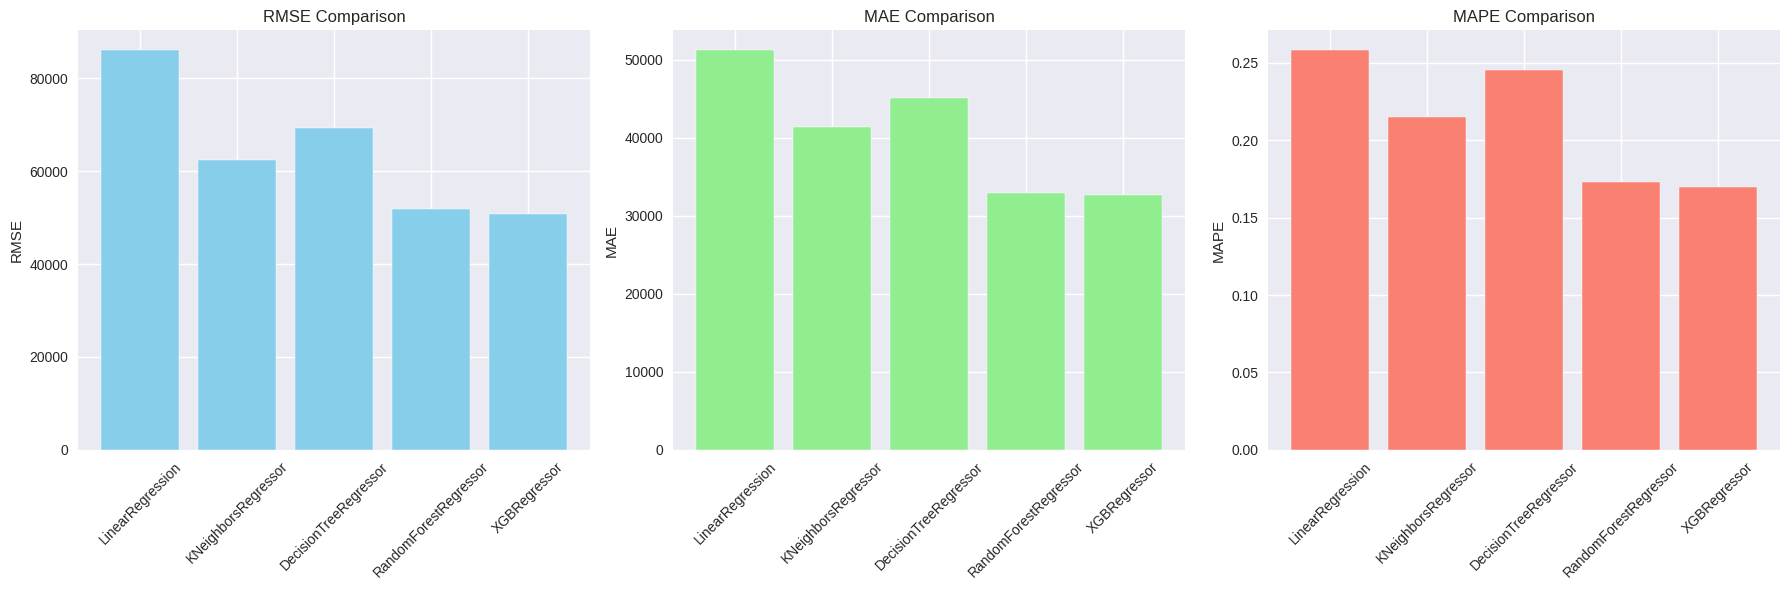

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Define performance metrics
data = {
    "Model": [
        "LinearRegression",
        "KNeighborsRegressor",
        "DecisionTreeRegressor",
        "RandomForestRegressor",
        "XGBRegressor"
    ],
    "RMSE Mean": [86066.132448, 62466.631287, 69296.401510, 51777.175572, 50719.060439],
    "MAE Mean": [51233.599224, 41424.744041, 45087.741597, 32970.723842, 32683.654320],
    "MAPE Mean": [0.258163, 0.215064, 0.245706, 0.172811, 0.169629]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot RMSE
axes[0].bar(df['Model'], df['RMSE Mean'], color='skyblue')
axes[0].set_title('RMSE Comparison')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)

# Plot MAE
axes[1].bar(df['Model'], df['MAE Mean'], color='lightgreen')
axes[1].set_title('MAE Comparison')
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)

# Plot MAPE
axes[2].bar(df['Model'], df['MAPE Mean'], color='salmon')
axes[2].set_title('MAPE Comparison')
axes[2].set_ylabel('MAPE')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/PURWADHIKA/Capstone2/Capstone2/Capstone 2-20250902T134008Z-1-001/Capstone 2/Datasets for Students/Regression/California House/model_performance_comparison.png")
plt.show()


**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [86]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,48004.640174,32543.752641,0.178680
RandomForest,50146.217948,32920.546109,0.181788


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [87]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [88]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1,
    verbose = 1
)

In [89]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler',
                                              StandardScaler(with_mean=False)),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           c...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'],
                   verbose=1)

In [90]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.815034,0.011045,0.022460,0.001039,0.9,0.059948,119,8,0.05,5,...,653.722709,1,-0.180681,-0.179079,-0.180587,-0.177371,-0.179145,-0.179373,0.001211,1
20,0.195037,0.027753,0.014399,0.000768,0.9,0.007743,143,4,0.38,6,...,412.004356,2,-0.193230,-0.194368,-0.189410,-0.187715,-0.192343,-0.191413,0.002473,2
3,0.708162,0.094523,0.040091,0.009003,0.5,0.021544,166,8,0.10,9,...,267.326378,4,-0.203244,-0.201549,-0.197301,-0.192905,-0.196677,-0.198335,0.003681,5
8,0.398285,0.009782,0.020724,0.000411,0.7,0.021544,182,6,0.31,2,...,701.987504,3,-0.197694,-0.192575,-0.197461,-0.193921,-0.195049,-0.195340,0.001989,3
17,0.383895,0.012214,0.019477,0.001151,0.6,0.001000,190,5,0.04,9,...,684.212878,5,-0.198401,-0.196547,-0.199807,-0.191087,-0.193357,-0.195840,0.003211,4


In [91]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -48442.48838545197
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(0.05994842503189409), 'model__n_estimators': np.int64(119), 'model__max_depth': np.int64(8), 'model__learning_rate': np.float64(0.05), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.8)}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [92]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,47396.992475,31666.705038,0.176456


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [93]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,48004.640174,32543.752641,0.17868


In [94]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,47396.992475,31666.705038,0.176456


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

- RMSE, MAE & MAPE sebelum tuning: 48004.640174	32543.752641	0.17868
- RMSE, MAE & MAPE setelah tuning: 47396.992475	31666.705038	0.176456


<Figure size 1100x900 with 0 Axes>

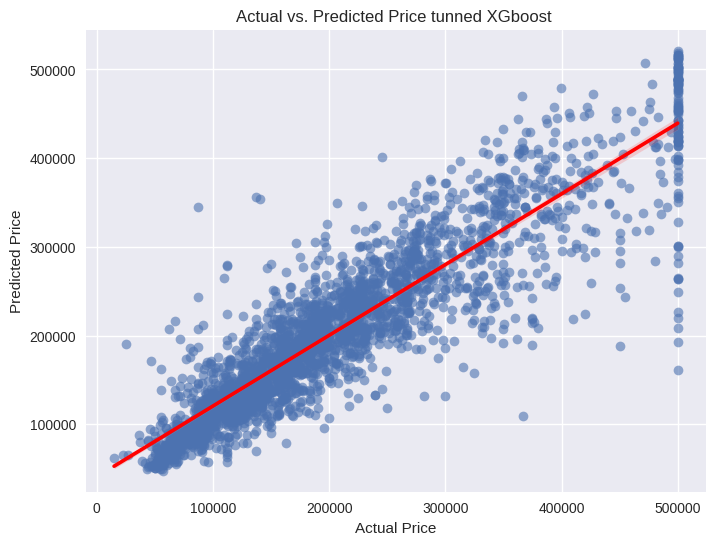

In [95]:
plt.figure(figsize=(11, 9))

# plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning,scatter_kws={'alpha':0.5}, line_kws={'color':'red'}).set(title='Actual vs. Prediction Price',
#                                                xlabel='Actual Price',
#                                                ylabel='Predicted Price');
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price tunned XGboost ")
plt.grid(True)
plt.show()

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 17% menjadikan model ini dapat dikategorikan ke dalam 'Good forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

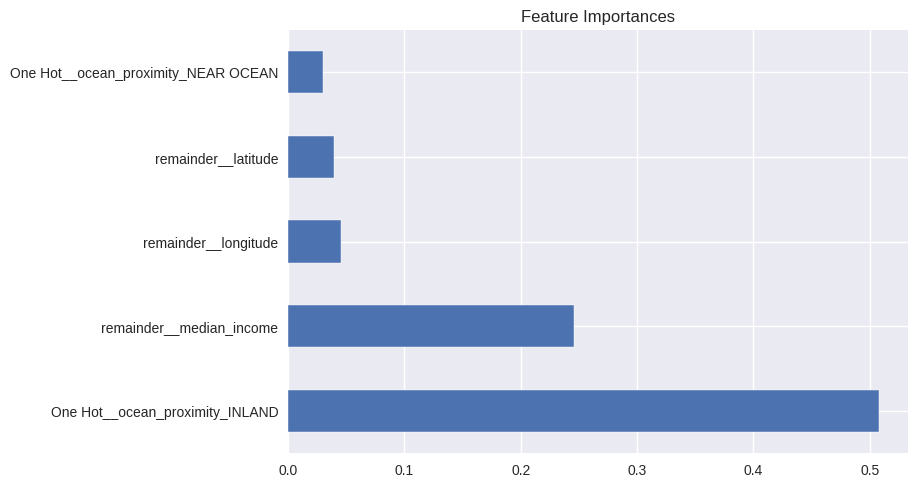

In [96]:
from sklearn.compose import ColumnTransformer
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, xgb_tuning['preprocessing'].get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berikut ini kesimpulan yang bisa kita ambil dari pemodelan yang kita lakukan:


 * dari sisi data set
  terdapat korelasi tertinggi yaitu 0.69 yang merupakan korelasi harga rumah terhadap median income. fiture inilah yang kita gunakan untuk memprediksi harga rumah di wilayah California.
 *  dari sisi lokasi :
   populasi harga rumah tertinggi berada  di daerah near ocean_ dan <1h ocean, di di sekitaran ocean bay. terdapat 2 harga rumah yang cukup tinggi yang berada di ISLAND(Pulau).
  Untuk mendapakakn prediksi dengan error yang kecil mkaa kita membatasi nilai rumah di cap di bawah $500000  

* dari sisi model yang kita gunakan
 secara berurut model Linier yang terbaik adalah XGboost, Random Forest, Decision tree dan linier regression
 XGBoost dan Random forest terpaut angka yang cukup kecil dan setelah melakukan hypertunning maka XGBoost mendapat nilai error yang paling kecil




* dari sisi Bisnis
 dengan menggunakan metode XGBoost maka kita dapatkan prediksi yang cukup baik yang bisa di gunakan oleh penjual, pembeli dan investor untuk bisa menentukan harga


### **Recommendations**

Dari proses pengolahan dataset California house valu. ada beberapa yang bisa kita lakukan selanjutnya untuk meningkatkan nilai prediksi kita menjadai lebih kuat:

* fitur seperti  
  - household  
  - total_bedrooms  
  - population  
  yang bisa kita gunakan untuk meningkatkan prediksi kita.
  untuk kasus pemodelan dengan calsification fitur Longitude and latitude dapat kita gunakan untuk melihat hubungan kedekatan.

 * dari sisi pemodelan
  setelah kita dapatkan XGBoost sebagai final Model yang cukup akurat untuk RMS,MAE dan MAPE dari pada Random Forest. maka kita bisa mencoba dengan pemodelan laein seperti Neural Networks.

****

#### **Save Model**

In [101]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open(r"/content/drive/MyDrive/Capstone2/California_House_Model.sav", 'wb'))

In [102]:
# Load model
filename = 'California_House_Model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [103]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(48004.64017442489)

** Quick Test Neural Netwokrs**

In [100]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'housing' dataframe is already loaded and has 'median_house_value' as target
# Separate features and target
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

# Identify numeric and categorical columns
num_attribs = list(X.select_dtypes(include=np.number).columns)
cat_attribs = ['ocean_proximity']

# Create preprocessing pipelines for numerical and categorical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])


# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ],
    remainder='passthrough'
)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


# Build model
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=[X_train_prepared.shape[1]]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)  # regression output
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=[keras.metrics.RootMeanSquaredError(), "mae"]
)

# Train
history = model.fit(X_train_prepared, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

mse, rmse, mae = model.evaluate(X_test_prepared, y_test, verbose=0)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

RMSE: 68096.38, MAE: 49289.50
